In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
df = pd.read_csv("exchange_rate.csv")
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [8]:
# Converting DateTime format into Date format
import datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date

In [9]:
df.shape

(7588, 2)

In [10]:
df.head()

,date,Ex_rate
0,1990-01-01,0.7855
1,1990-02-01,0.7818
2,1990-03-01,0.7867
3,1990-04-01,0.7860
4,1990-05-01,0.7849


### Eploratory Data Analysis

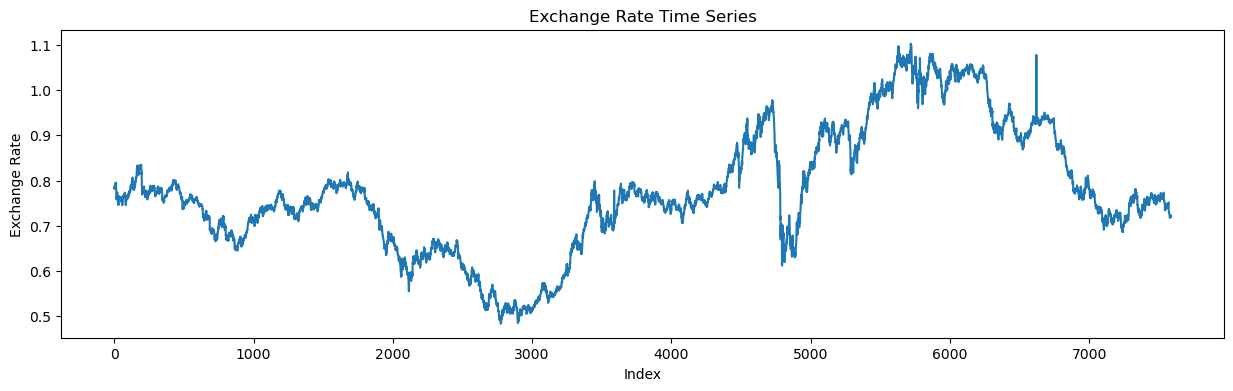

In [11]:
# Line plot of the Ex_rate
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 4))
sns.lineplot(df, x=df.index, y='Ex_rate')
plt.title('Exchange Rate Time Series')
plt.xlabel('Index')
plt.ylabel('Exchange Rate')
plt.show()
# We can observe that the data is non-stationary.

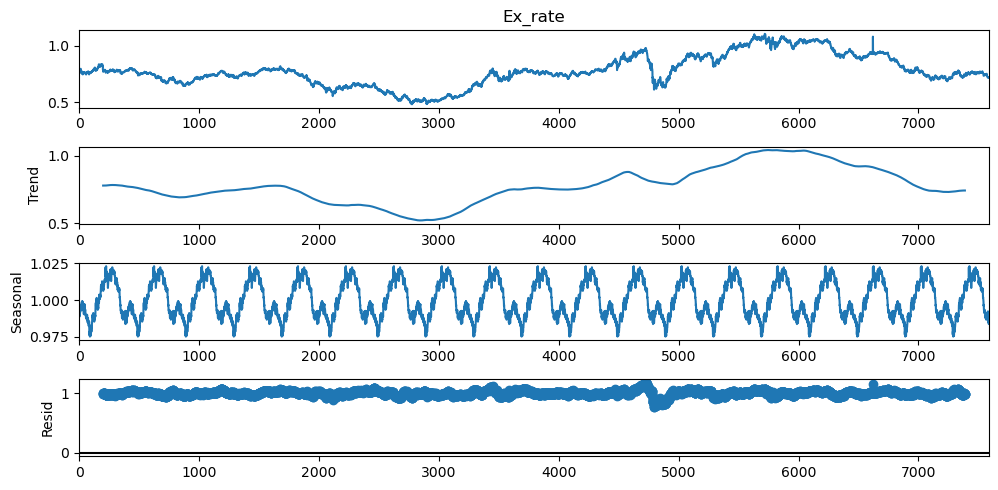

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 10, 5
decompose_ts_add = seasonal_decompose(df.Ex_rate, model='multiplicative', period=400)
decompose_ts_add.plot()
plt.show()

In [13]:
# Here there are X variables in the dataset.
# Hence, we have to create the X variables
# t variable is the column which contains row number.
df['t'] = df.index + 1
df.head()

,date,Ex_rate,t
0,1990-01-01,0.7855,1
1,1990-02-01,0.7818,2
2,1990-03-01,0.7867,3
3,1990-04-01,0.7860,4
4,1990-05-01,0.7849,5


In [15]:
import numpy as np
df['log_ex_rate'] = np.log(df['Ex_rate'])
df.head()

,date,Ex_rate,t,log_ex_rate
0,1990-01-01,0.7855,1,-0.241435
1,1990-02-01,0.7818,2,-0.246156
2,1990-03-01,0.7867,3,-0.239908
3,1990-04-01,0.7860,4,-0.240798
4,1990-05-01,0.7849,5,-0.242199


In [16]:
df['t_square'] = df['t'] ** 2
df.head()

,date,Ex_rate,t,log_ex_rate,t_square
0,1990-01-01,0.7855,1,-0.241435,1
1,1990-02-01,0.7818,2,-0.246156,4
2,1990-03-01,0.7867,3,-0.239908,9
3,1990-04-01,0.7860,4,-0.240798,16
4,1990-05-01,0.7849,5,-0.242199,25


In [17]:
# Extracting month from the date column
df['month'] = pd.to_datetime(df['date']).dt.strftime('%b')
df.head()

,date,Ex_rate,t,log_ex_rate,t_square,month
0,1990-01-01,0.7855,1,-0.241435,1,Jan
1,1990-02-01,0.7818,2,-0.246156,4,Feb
2,1990-03-01,0.7867,3,-0.239908,9,Mar
3,1990-04-01,0.7860,4,-0.240798,16,Apr
4,1990-05-01,0.7849,5,-0.242199,25,May


In [18]:
df['year'] = pd.to_datetime(df['date']).dt.strftime('%Y')
df.head()

,date,Ex_rate,t,log_ex_rate,t_square,month,year
0,1990-01-01,0.7855,1,-0.241435,1,Jan,1990
1,1990-02-01,0.7818,2,-0.246156,4,Feb,1990
2,1990-03-01,0.7867,3,-0.239908,9,Mar,1990
3,1990-04-01,0.7860,4,-0.240798,16,Apr,1990
4,1990-05-01,0.7849,5,-0.242199,25,May,1990


In [19]:
list(df['month'].unique())

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [20]:
# One Hot Encoding
encoded_df = pd.get_dummies(df['month'], prefix='', dtype=int).sort_index(axis=1)
encoded_df

,_Apr,_Aug,_Dec,_Feb,_Jan,_Jul,_Jun,_Mar,_May,_Nov,_Oct,_Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7583,0,0,0,0,0,0,1,0,0,0,0,0
7584,0,0,0,0,0,1,0,0,0,0,0,0
7585,0,1,0,0,0,0,0,0,0,0,0,0
7586,0,0,0,0,0,0,0,0,0,0,0,1


In [21]:
final_df = pd.concat([df, encoded_df], axis = 1)
final_df.head()

,date,Ex_rate,t,log_ex_rate,t_square,month,year,_Apr,_Aug,_Dec,_Feb,_Jan,_Jul,_Jun,_Mar,_May,_Nov,_Oct,_Sep
0,1990-01-01,0.7855,1,-0.241435,1,Jan,1990,0,0,0,0,1,0,0,0,0,0,0,0
1,1990-02-01,0.7818,2,-0.246156,4,Feb,1990,0,0,0,1,0,0,0,0,0,0,0,0
2,1990-03-01,0.7867,3,-0.239908,9,Mar,1990,0,0,0,0,0,0,0,1,0,0,0,0
3,1990-04-01,0.7860,4,-0.240798,16,Apr,1990,1,0,0,0,0,0,0,0,0,0,0,0
4,1990-05-01,0.7849,5,-0.242199,25,May,1990,0,0,0,0,0,0,0,0,1,0,0,0


0.2611267376737365

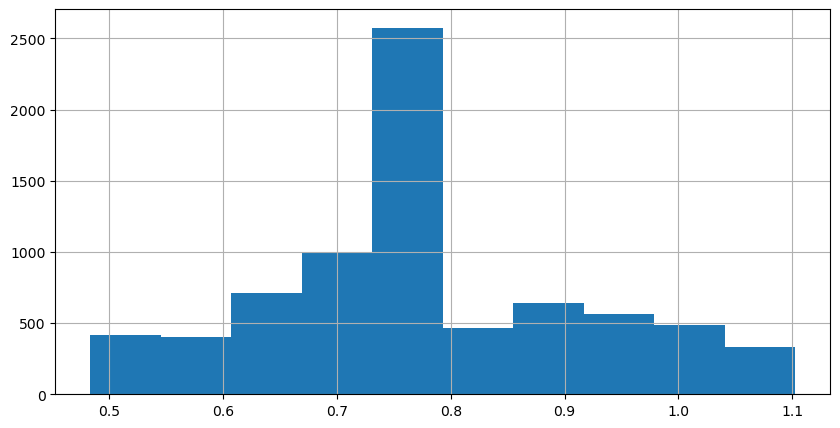

In [22]:
# histogram
df['Ex_rate'].hist()
df['Ex_rate'].skew()

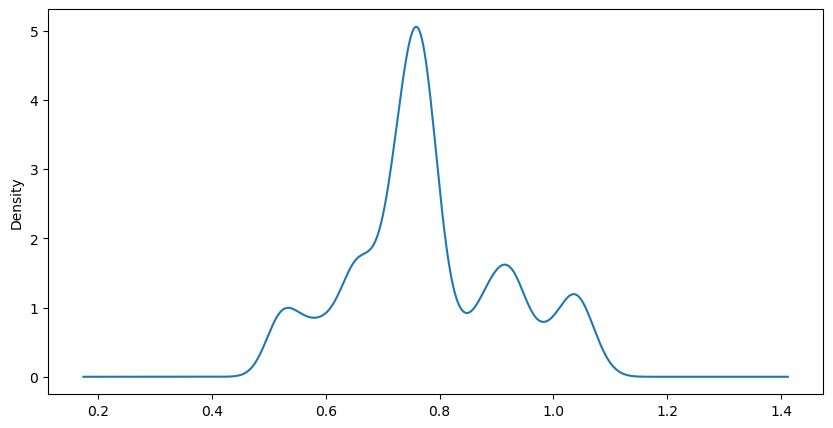

In [23]:
df['Ex_rate'].plot(kind='kde')
plt.show()

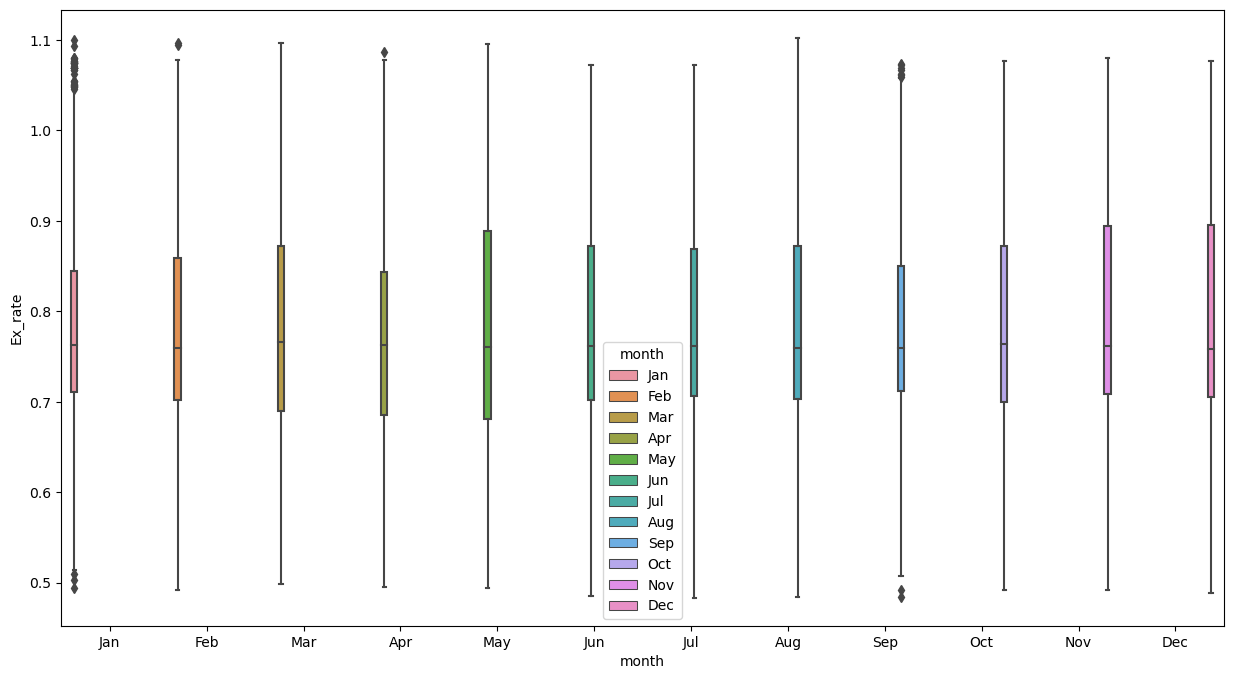

In [24]:
# Box plot of Ex_rate column monthly-wise
plt.figure(figsize=(15, 8))
sns.boxplot(data=final_df, x = 'month', y='Ex_rate', hue='month')
plt.show()

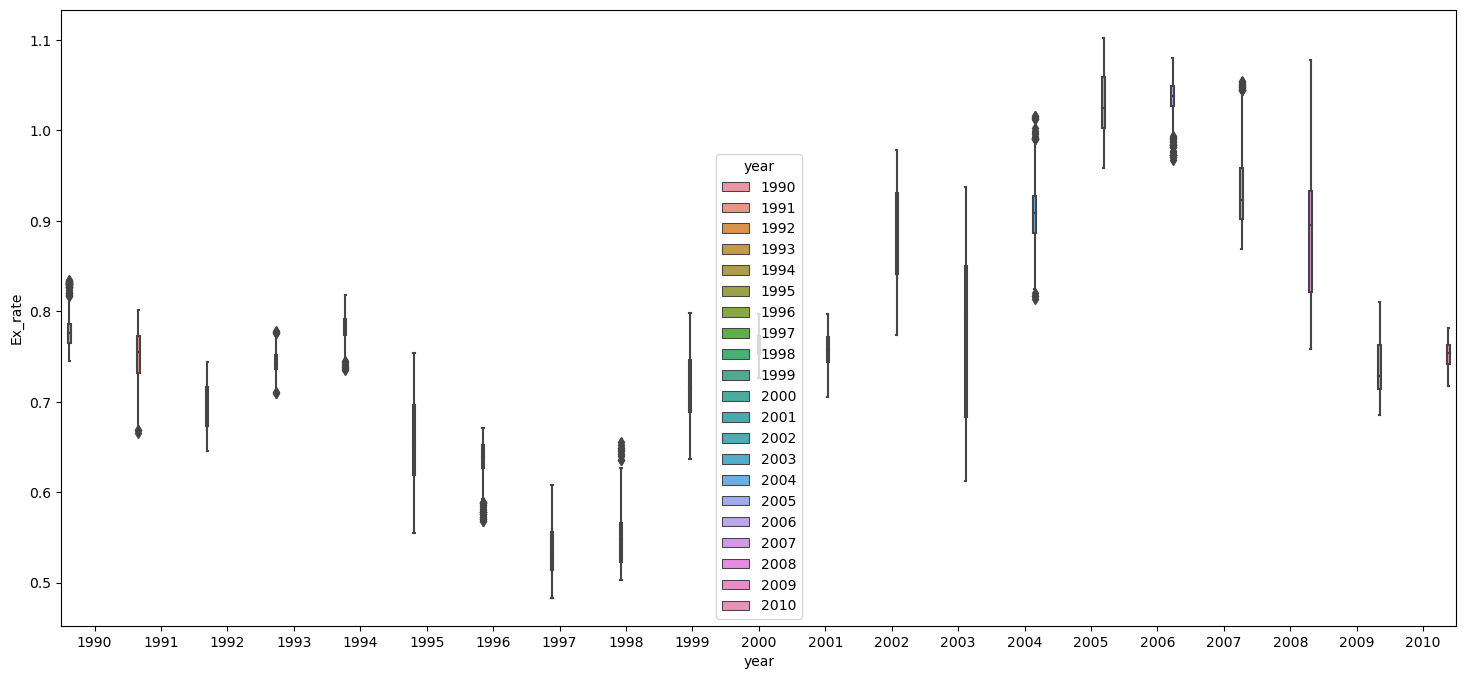

In [25]:
# Box plot of Ex_rate column Year-wise
plt.figure(figsize=(18, 8))
sns.boxplot(data=final_df, x = 'year', y='Ex_rate', hue='year')
plt.show()

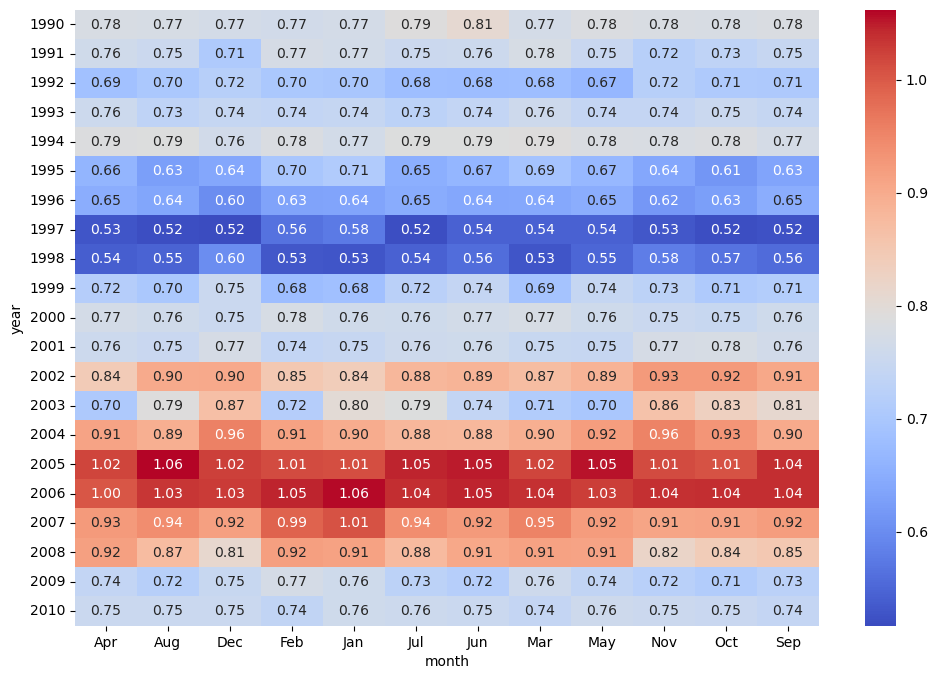

In [26]:
heat_map = pd.pivot_table(data=final_df, index='year', values='Ex_rate', columns='month')

plt.figure(figsize=(12, 8))
sns.heatmap(data=heat_map, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

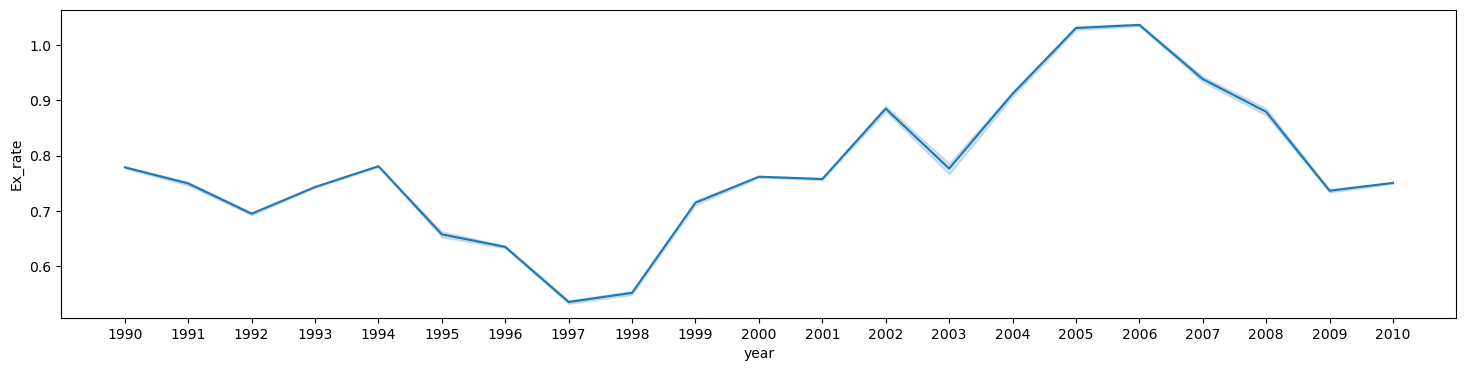

In [27]:
# Year-wise Line plot
plt.figure(figsize=(18, 4))
sns.lineplot(data=final_df, x='year', y='Ex_rate')
plt.show()

In [28]:
df['Ex_rate_diff'] = df['Ex_rate'].diff()

<Axes: >

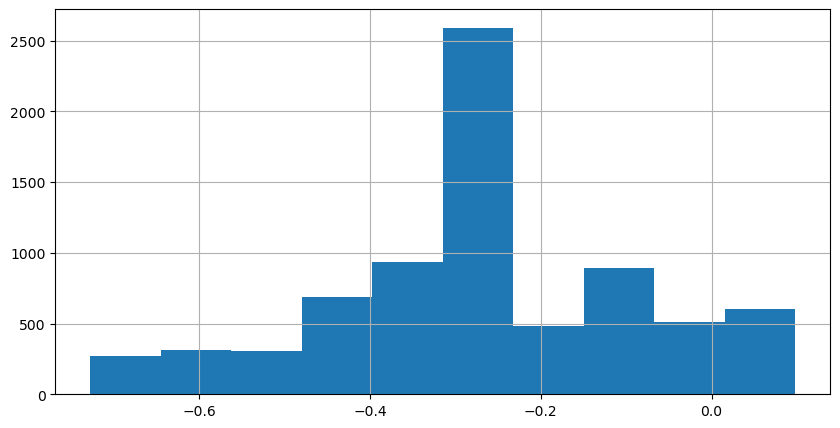

In [29]:
df['log_ex_rate'].hist()

In [30]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Ex_rate_diff'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -99.3934312011863
p-value: 0.0


#### Autocorrelation and Partial Autocorrelation

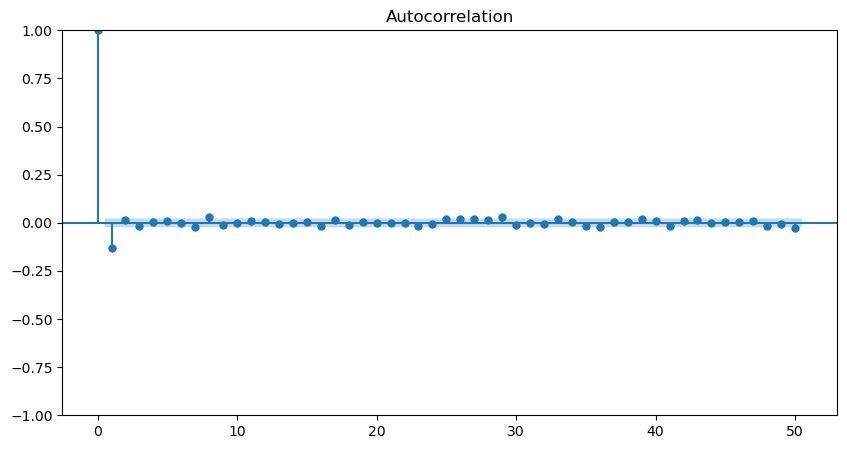

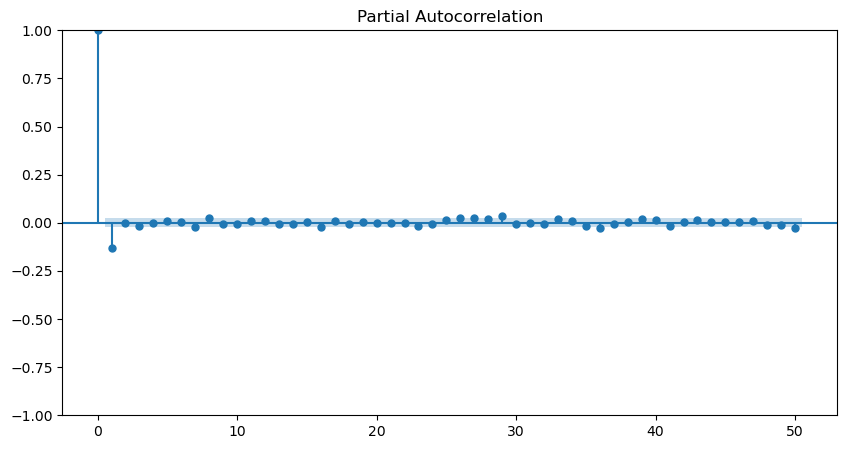

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Ex_rate_diff'].dropna(), lags=50)
plt.show()

plot_pacf(df['Ex_rate_diff'].dropna(), lags=50)
plt.show()

##### Holt-Winter's Exponential Smoothing

In [32]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

smoothing_levels = np.linspace(0.1, 0.9, 9) 
smoothing_slopes = np.linspace(0.01, 0.1, 10)
best_params = None
best_rmse = float('inf')

for alpha in smoothing_levels:
    for beta in smoothing_slopes:
        model = Holt(df['Ex_rate'], exponential=True, damped=True)
        model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta)
        predictions = model_fit.predict(start=0, end=len(df)-1)
        rmse = mean_squared_error(df['Ex_rate'], predictions, squared=False)
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = (alpha, beta)

In [33]:
# Model fitting and forecating
model_holt = Holt(df['Ex_rate'], exponential=True, damped=True)
fitted_holt = model_holt.fit(smoothing_level=best_params[0], smoothing_slope=best_params[1])
predictions_holt = fitted_holt.predict(start=0, end=len(df)-1)

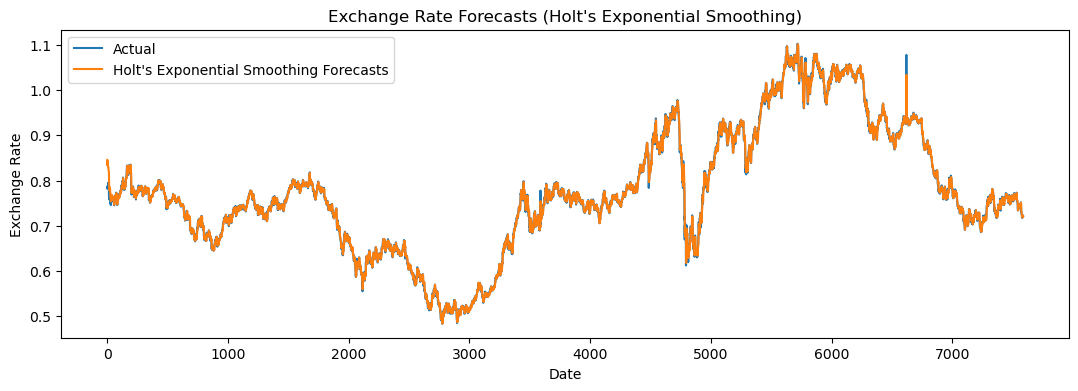

In [34]:
# Visualize the forecasts

plt.figure(figsize=(13, 4))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(predictions_holt, label='Holt\'s Exponential Smoothing Forecasts')
plt.title('Exchange Rate Forecasts (Holt\'s Exponential Smoothing)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [35]:
final_df['Ex_rate'] = fitted_holt.fittedvalues

In [36]:
final_df

,date,Ex_rate,t,log_ex_rate,t_square,month,year,_Apr,_Aug,_Dec,_Feb,_Jan,_Jul,_Jun,_Mar,_May,_Nov,_Oct,_Sep
0,1990-01-01,0.785154,1,-0.241435,1,Jan,1990,0,0,0,0,1,0,0,0,0,0,0,0
1,1990-02-01,0.784550,2,-0.246156,4,Feb,1990,0,0,0,1,0,0,0,0,0,0,0,0
2,1990-03-01,0.781816,3,-0.239908,9,Mar,1990,0,0,0,0,0,0,0,1,0,0,0,0
3,1990-04-01,0.784507,4,-0.240798,16,Apr,1990,1,0,0,0,0,0,0,0,0,0,0,0
4,1990-05-01,0.784879,5,-0.242199,25,May,1990,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,2010-06-10,0.718759,7584,-0.330598,57517056,Jun,2010,0,0,0,0,0,0,1,0,0,0,0,0
7584,2010-07-10,0.718446,7585,-0.325953,57532225,Jul,2010,0,0,0,0,0,1,0,0,0,0,0,0
7585,2010-08-10,0.720723,7586,-0.324074,57547396,Aug,2010,0,1,0,0,0,0,0,0,0,0,0,0
7586,2010-09-10,0.722379,7587,-0.327359,57562569,Sep,2010,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
mae_holt = mean_absolute_error(df['Ex_rate'], predictions_holt)
rmse_holt = mean_squared_error(df['Ex_rate'], predictions_holt, squared=False)
mape_holt = np.mean(np.abs((df['Ex_rate'] - predictions_holt) / df['Ex_rate'])) * 100

In [39]:
print('\nHolt\'s Exponential Smoothing:')
print('  MAE:', mae_holt)
print('  RMSE:', rmse_holt)
print('  MAPE:', mape_holt)


Holt's Exponential Smoothing:
  MAE: 0.003959217720080361
  RMSE: 0.006446271592376407
  MAPE: 0.5163638014009625


### ARIMA Model

### 3. Data Partition

In [40]:
Train = final_df[final_df['year'] <= '2009']
Test = final_df[final_df['year'] > '2009']

In [41]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(predictions_holt, order=(1,1,1))  # base model
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               30681.137
Date:                Tue, 29 Oct 2024   AIC                         -61356.273
Time:                        19:31:50   BIC                         -61335.471
Sample:                             0   HQIC                        -61349.134
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3457      0.030     11.418      0.000       0.286       0.405
ma.L1         -0.1742      0.030     -5.734      0.000      -0.234      -0.115
sigma2      1.798e-05   4.97e-08    361.806      0.000    1.79e-05    1.81e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2863304.61
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.93   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
model = ARIMA(predictions_holt, order=(2,1,2))  # base model
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7588
Model:                 ARIMA(2, 1, 2)   Log Likelihood               30682.749
Date:                Tue, 29 Oct 2024   AIC                         -61355.499
Time:                        19:32:02   BIC                         -61320.828
Sample:                             0   HQIC                        -61343.600
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0426      0.402     -0.106      0.916      -0.831       0.746
ar.L2          0.0345      0.153      0.225      0.822      -0.266       0.335
ma.L1          0.2139      0.402      0.532      0.595      -0.574       1.002
ma.L2          0.0394      0.090      0.438      0.662      -0.137       0.216
sigma2      1.798e-05   5.07e-08    354.698      0.000    1.79e-05    1.81e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2860175.66
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.93   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
import itertools

p = [0, 1, 2, 4, 6]
d = range(0, 3)
q = range(0, 3)
optimal_params = None
min_aic = float('inf')

pdq = list(itertools.product(p, d, q))

for param in pdq:
    try:
        model = ARIMA(predictions_holt, order=param)
        results = model.fit()
        if results.aic < min_aic:
            optimal_params = param
        min_aic = min(min_aic, results.aic)
        
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue

print(f'Best params: {optimal_params}, min_aic: {min_aic}')

ARIMA(0, 0, 0) - AIC:-8672.365091701486
ARIMA(0, 0, 1) - AIC:-18894.5025933507
ARIMA(0, 0, 2) - AIC:-27735.909692459078


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0) - AIC:-61111.42574820864
ARIMA(0, 1, 1) - AIC:-61326.99821983106


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2) - AIC:-61359.49567681203
ARIMA(0, 2, 0) - AIC:-57324.07215286252
ARIMA(0, 2, 1) - AIC:-60130.53120024434
ARIMA(0, 2, 2) - AIC:-60664.76820882639
ARIMA(1, 0, 0) - AIC:-61111.28791302872


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1) - AIC:-61327.53800140167
ARIMA(1, 0, 2) - AIC:-61360.27580629908
ARIMA(1, 1, 0) - AIC:-61350.45718985728
ARIMA(1, 1, 1) - AIC:-61356.27339186179
ARIMA(1, 1, 2) - AIC:-61357.4442782986
ARIMA(1, 2, 0) - AIC:-58888.10808139663
ARIMA(1, 2, 1) - AIC:-60369.718602810986
ARIMA(1, 2, 2) - AIC:-60559.39109952997


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0) - AIC:-61351.14577515295
ARIMA(2, 0, 1) - AIC:-61356.85675813432


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2) - AIC:-61358.25350056649
ARIMA(2, 1, 0) - AIC:-61357.69783813435
ARIMA(2, 1, 1) - AIC:-61357.29489897654
ARIMA(2, 1, 2) - AIC:-61355.49868209117
ARIMA(2, 2, 0) - AIC:-59445.66139216823
ARIMA(2, 2, 1) - AIC:-60878.984026190476
ARIMA(2, 2, 2) - AIC:-60781.880707381875


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 0) - AIC:-61358.11429770234


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 1) - AIC:-61354.264137813094


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 2) - AIC:-60923.87378454041
ARIMA(4, 1, 0) - AIC:-61355.637425842746
ARIMA(4, 1, 1) - AIC:-61353.52542804748
ARIMA(4, 1, 2) - AIC:-61352.91230560516
ARIMA(4, 2, 0) - AIC:-60116.023922573724
ARIMA(4, 2, 1) - AIC:-60395.05149678795
ARIMA(4, 2, 2) - AIC:-60743.58818349624
ARIMA(6, 0, 0) - AIC:-61355.30247564645


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 0, 1) - AIC:-61350.49766454671
ARIMA(6, 0, 2) - AIC:-61351.35541513216
ARIMA(6, 1, 0) - AIC:-61352.580720308004
ARIMA(6, 1, 1) - AIC:-61350.4429704828
ARIMA(6, 1, 2) - AIC:-61348.587772085564
ARIMA(6, 2, 0) - AIC:-60382.40178104373
ARIMA(6, 2, 1) - AIC:-60310.840672363454
ARIMA(6, 2, 2) - AIC:-60944.300141592554
Best params: (1, 0, 2), min_aic: -61360.27580629908


In [44]:
# Best model based on grid search

model = ARIMA(predictions_holt, order=optimal_params)
fitted_ARIMA = model.fit()  
fitted_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7588
Model:                 ARIMA(1, 0, 2)   Log Likelihood               30685.138
Date:                Tue, 29 Oct 2024   AIC                         -61360.276
Time:                        19:34:11   BIC                         -61325.604
Sample:                             0   HQIC                        -61348.377
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7771      0.084      9.269      0.000       0.613       0.941
ar.L1          0.9993      0.000   2281.355      0.000       0.998       1.000
ma.L1          0.1718      0.002     73.567      0.000       0.167       0.176
ma.L2          0.0670      0.006     11.252      0.000       0.055       0.079
sigma2      1.797e-05   5.12e-08    350.682      0.000    1.79e-05    1.81e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865934.81
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.93   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

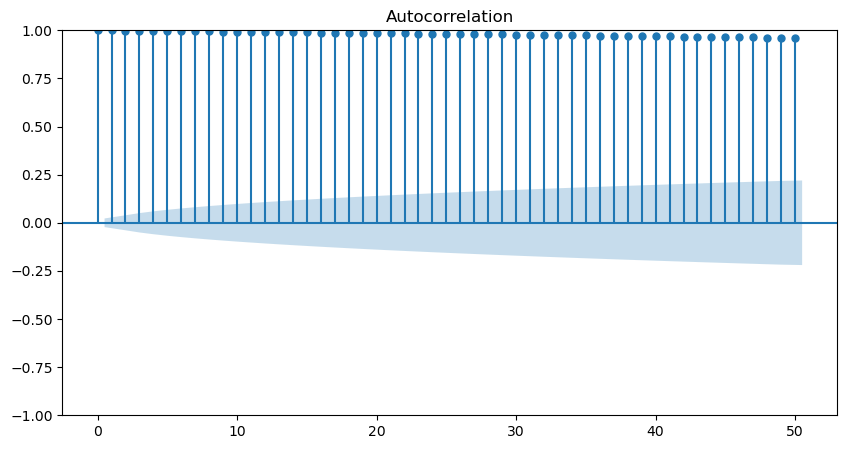

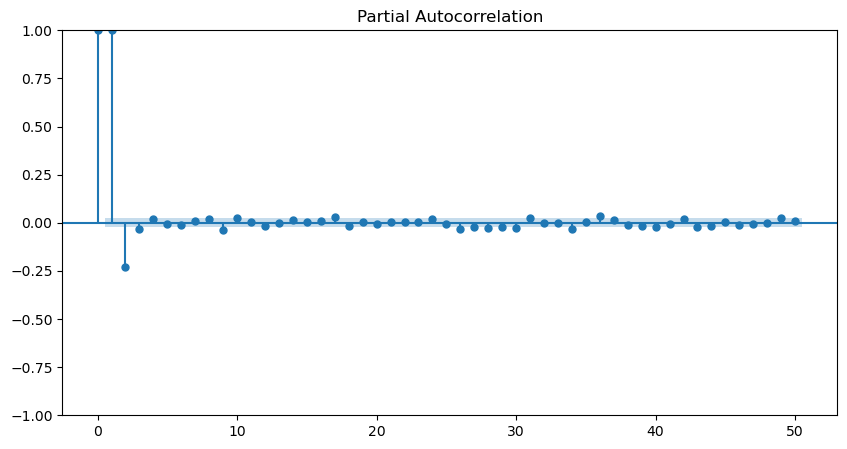

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(predictions_holt, lags=50)
plt.show()
plot_pacf(predictions_holt, lags=50)
plt.show()

In [46]:
forecast = fitted_ARIMA.predict(start=len(Train), end=len(final_df) - 1)

In [47]:
mae_arima = mean_absolute_error(Test['Ex_rate'], forecast)  # Use your ARIMA predictions from before
rmse_arima = mean_squared_error(Test['Ex_rate'], forecast, squared=False)
mape_arima = np.mean(np.abs((Test['Ex_rate'] - forecast) / Test['Ex_rate'])) * 100

In [48]:
print('ARIMA Model:')
print('  MAE:', mae_arima)
print('  RMSE:', rmse_arima)
print('  MAPE:', mape_arima)

ARIMA Model:
  MAE: 0.0021413943057506657
  RMSE: 0.0030716259643900476
  MAPE: 0.28523092322436255


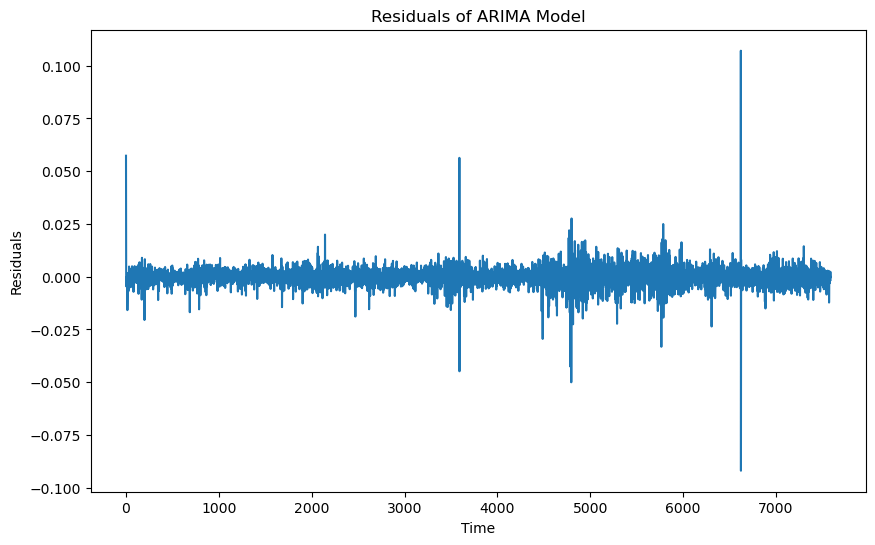

In [49]:
residuals = fitted_ARIMA.resid 
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

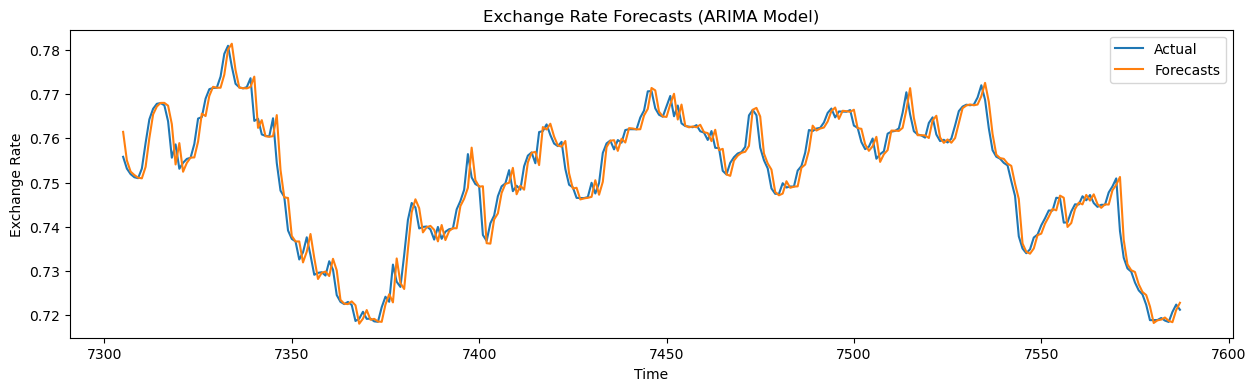

In [50]:
plt.figure(figsize=(15, 4))
plt.plot(Test.Ex_rate, label='Actual')
plt.plot(forecast, label='Forecasts')
plt.title('Exchange Rate Forecasts (ARIMA Model)')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

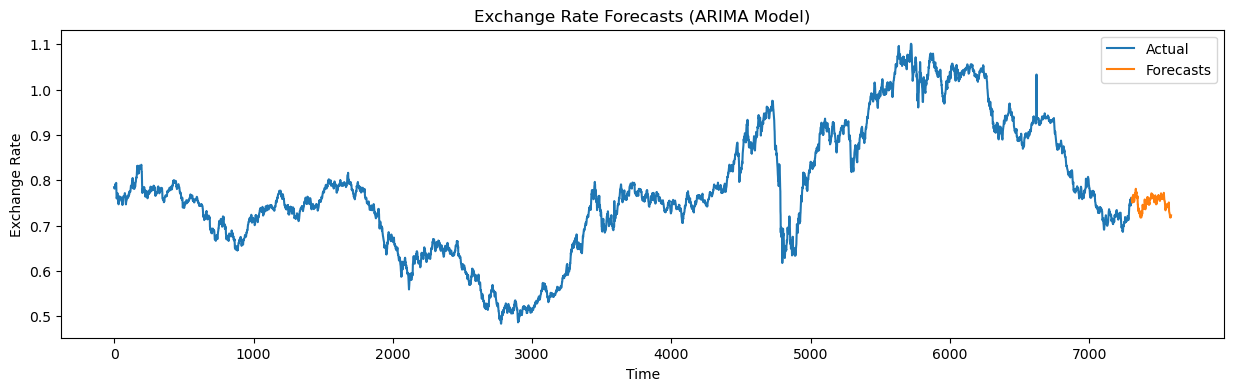

In [51]:
plt.figure(figsize=(15, 4))
plt.plot(Train.Ex_rate, label='Actual')
plt.plot(forecast, label='Forecasts')
plt.title('Exchange Rate Forecasts (ARIMA Model)')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()